# K-Means Clustering
K-Means Clustering merupakan salah satu algoritma Machine Learning khususnya Unsupervised Learning yang populer digunakan. Dalam algoritma ini, kita akan akrab dengan nilai k yang merupakan jumlah cluster yang akan dibentuk. Sebelum mulai menggunakan k-Means, kita harus mendefinisikan nilai k terlebih dahulu.



Pada dasarnya, nilai k ini akan merujuk kepada jumlah centroid (titik pusat dari setiap cluster) yang kita butuhkan di dataset. Gambar di atas merupakan contoh penyebaran data sebelum dan sesudah menggunakan algoritma K-Means dengan nilai k = 3. 



In [121]:
import pandas as pd
import numpy as np

# Ambil Data TF

In [122]:
%cd /content/drive/MyDrive/webmining

/content/drive/MyDrive/webmining


In [123]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('hasil_tweet_anis.csv')

vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])
dataTextPre = dataTextPre.drop(labels="Unnamed: 0",axis=1)
dataTextPre

,tweet,labels
0,"['tweet', 'solo', 'numpang', 'citra', 'kader',...",kontra
1,"['dukung', 'main', 'play', 'victim', 'sesuai',...",pro
2,"['putra', 'asli', 'cianjur', 'anies']",pro
3,"['asmara', 'seknasri', 'ok', 'aku', 'sbg', 'ce...",pro
4,"['serah', 'beliau', 'fleksibel']",pro
5,['mantab'],kontra
6,"['juang', 'uang', 'amp', 'tenagapartai', 'amp'...",pro
7,"['kerja', 'tebar', 'benci', 'perintah', 'sah',...",pro
8,"['sakit', 'hati', 'dukung', 'ahok', 'simulut',...",kontra
9,"['asmara', 'seknasri', 'margin', 'error', 'dat...",pro


In [124]:
matrik_vsm=bag.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(58, 347)

In [125]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [126]:
a=vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [127]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

58


,abah,ach,adil,adl,adlh,ahok,aja,aje,aji,akibat,...,victim,video,warga,wujud,ya,yaa,yes,yth,yudohusodo,zaman
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
DataTFIDF = TfidfVectorizer()
TFIDF = DataTFIDF.fit_transform(dataTextPre['tweet']).toarray()
TFIDF = pd.DataFrame(TFIDF)
TFIDF

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.254318,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.379547,0.000000,0.000000,0.000000,0.249342,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.219297,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.215438,0.000000,0.000000,0.000000,0.215438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,0.000000,0.482937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [129]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3)
kmeans=kmeans.fit(dataTF)
prediksi=kmeans.predict(dataTF)
centroids = kmeans.cluster_centers_

data=pd.DataFrame(prediksi,columns=["Cluster"])
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,Cluster
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Menambahkan Label Pada Hasil TF

In [130]:
datalabel = pd.read_csv('/content/drive/MyDrive/webmining/hasil_tweet_anis.csv')
dataJurnal = pd.concat([dataTF.reset_index(drop=True), datalabel["labels"]], axis=1)
dataJurnal

,"(abah,)","(ach,)","(adil,)","(adl,)","(adlh,)","(ahok,)","(aja,)","(aje,)","(aji,)","(akibat,)",...,"(video,)","(warga,)","(wujud,)","(ya,)","(yaa,)","(yes,)","(yth,)","(yudohusodo,)","(zaman,)",labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,kontra
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,pro
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,pro
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kontra
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro
8,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,kontra
9,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro


In [131]:
dataJurnal['labels'].unique()

array(['kontra', 'pro'], dtype=object)

In [132]:
dataJurnal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 348 entries, ('abah',) to labels
dtypes: int64(347), object(1)
memory usage: 157.8+ KB


# Split Data

In [133]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataJurnal.drop(labels=['labels'], axis=1),
    dataJurnal['labels'],
    test_size=0.3,
    random_state=0)

In [134]:
X_train

,"(abah,)","(ach,)","(adil,)","(adl,)","(adlh,)","(ahok,)","(aja,)","(aje,)","(aji,)","(akibat,)",...,"(victim,)","(video,)","(warga,)","(wujud,)","(ya,)","(yaa,)","(yes,)","(yth,)","(yudohusodo,)","(zaman,)"
14,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
56,0,0,0,0,0,0,0,1,3,0,...,0,0,0,0,1,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KNN (Analisis Sentimen)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
testing=[]
listnum=[]
for i in range(2,21):
  listnum.append(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  Y_pred = neigh.predict(X_test) 
  testing.append(Y_pred)
testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

[array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
        'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro'],
       dtype=object),
 array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
        'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro'],
       dtype=object),
 array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
        'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro'],
       dtype=object),
 array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
        'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro'],
       dtype=object),
 array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
        'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro'],
       dtype=object),
 array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
        'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro'],
       dtype=object),
 array(['p

In [136]:
y_test

35       pro
34       pro
42       pro
27    kontra
11    kontra
2        pro
33    kontra
45    kontra
22       pro
48       pro
4        pro
10    kontra
29       pro
40       pro
32       pro
41    kontra
37       pro
7        pro
Name: labels, dtype: object

# Hasil

In [137]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
listtest=[]
listacc=[]
for i in range(len(testing)):
  accuracy_neigh=round(accuracy_score(y_test,testing[i])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  listappend=listnum[i]
  appendlist=listappend,accuracy_neigh
  listtest.append(appendlist)
  listacc.append(accuracy_neigh)
listtest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

[(2, 66.67),
 (3, 66.67),
 (4, 66.67),
 (5, 66.67),
 (6, 66.67),
 (7, 66.67),
 (8, 66.67),
 (9, 66.67),
 (10, 66.67),
 (11, 66.67),
 (12, 66.67),
 (13, 66.67),
 (14, 66.67),
 (15, 66.67),
 (16, 66.67),
 (17, 66.67),
 (18, 66.67),
 (19, 66.67),
 (20, 66.67)]

# Hasil Akurasi

Text(0, 0.5, 'Persentase Akurasi')

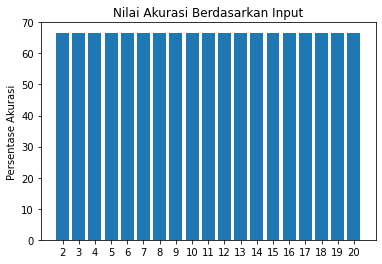

In [138]:
from matplotlib import pyplot as plt
plt.bar(listnum, listacc)
plt.xticks(listnum)
plt.title('Nilai Akurasi Berdasarkan Input')
plt.ylabel('Persentase Akurasi')